**Step 1: Data Loading and Preparation**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_data = pd.read_csv('/train.csv')

# Split the dataset into features and target variable
X = train_data.drop('price_range', axis=1)
y = train_data['price_range']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Step 2: Train Classification Model and Calculate Accuracy Metrics**

In [3]:
# Train the classification model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Accuracy: 0.8925
Precision: 0.8961376040265876
Recall: 0.8925
F1-Score: 0.8933396464201718


**Interpretation:**

**Accuracy:** The ratio of correctly predicted instances to the total instances.

**Precision:** The ratio of correctly predicted positive observations to the total predicted positives.

**Recall:**The ratio of correctly predicted positive observations to all observations in the actual class.

**F1-Score:**The weighted average of Precision and Recall.

**Step 3: Confusion Matrix Interpretation**

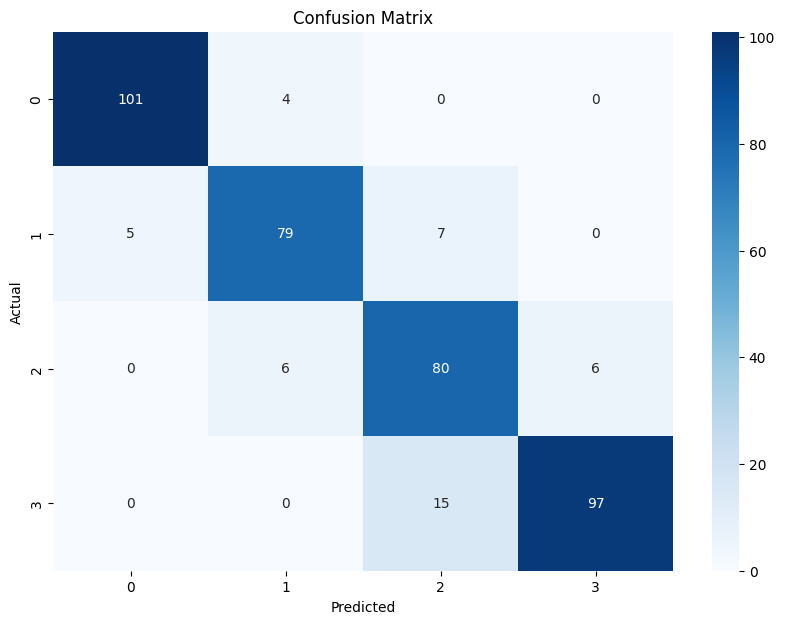

In [4]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives.
It helps in understanding the model's performance in terms of misclassification.

**Step 4: ROC/AUC Calculation**

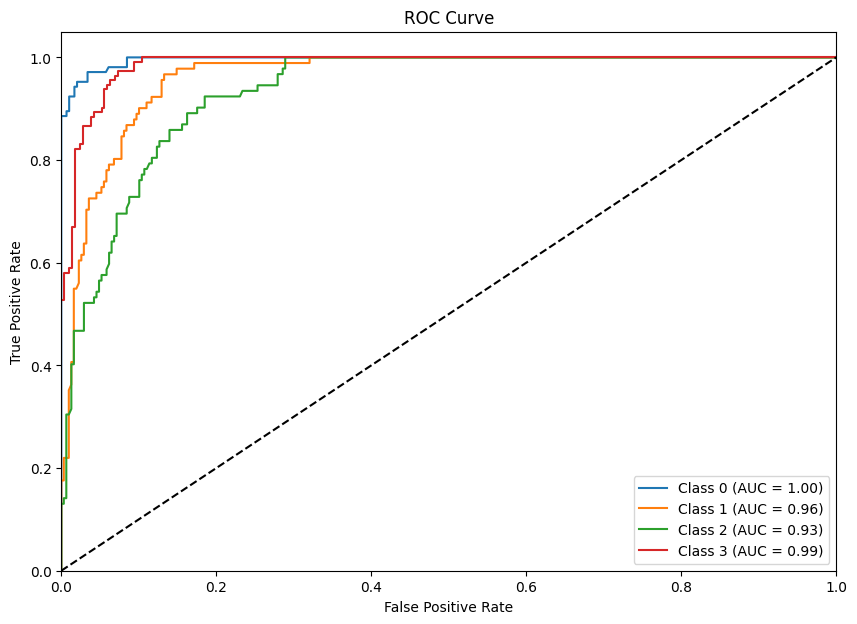

In [5]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

# Train the model with OneVsRest strategy
model = OneVsRestClassifier(RandomForestClassifier(random_state=42))
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


**ROC Curve:** Plots the true positive rate against the false positive rate.

**AUC Value:** Measures the entire two-dimensional area underneath the ROC curve. An AUC of 1 represents a perfect model, while an AUC of 0.5 represents a model with no discrimination capacity.

**Step 5: Cross-Validation Reporting**

In [6]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

# Calculate mean and standard deviation of the accuracy
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

print(f'Cross-Validation Mean Accuracy: {mean_accuracy}')
print(f'Cross-Validation Standard Deviation: {std_accuracy}')


Cross-Validation Mean Accuracy: 0.8484999999999999
Cross-Validation Standard Deviation: 0.010559356040971444


**Mean Accuracy:** The average accuracy across all folds.

**Standard Deviation:** The variation of accuracy across all folds.

**Cross-Validation:** Provides a more robust evaluation by testing the model on different subsets of the data, reducing the risk of overfitting.